In [75]:
from architecture import pipe
from PIL import Image
from dataloader import testing_dataset
from util import util
from torch.utils.data import DataLoader
import torch
from architecture import pipe
from torch.nn import BCELoss

In [76]:
'hello'

'hello'

In [77]:
state = torch.load('./saves/exp_6/model_epoch_10.pth')

In [78]:
vision_model = pipe.get_model().to('cpu')
vision_model.load_state_dict(state['model_state_dict'])

<All keys matched successfully>

In [79]:
dataset = DataLoader(testing_dataset, shuffle=True)

In [85]:
sample = next(iter(dataset))

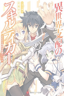

In [86]:
util.to_pil(sample[0][0]).resize((64, 96))

In [87]:
print(sample[1])
util.to_classes(sample[1])

tensor([[0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.]])


(['mature', 'shounen', 'adult', 'harem', 'adventure', 'action', 'comedy'],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [83]:
res = vision_model(sample[0]).sigmoid()

In [84]:
util.pick_top(res[0], 6, prettify=True)

(['action', 'enmity', 'adventure', 'drama', 'comedy', 'harem'],
 [0.4812398850917816,
  0.3894060552120209,
  0.35833242535591125,
  0.3078644573688507,
  0.2526138424873352,
  0.2250789850950241])

In [74]:
util.calculate_precession(res, sample[1], cutoff=.45)

tensor([0.])